<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/netlix_fe_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Dataset Analysis

## Task Overview:
1. Perform Feature Engineering, EDA, and Data Visualization on each feature
2. Explain mathematical equations used
3. Perform EDA and Data Visualization for the netflix_titles.csv dataset


## 1. Import Required Libraries

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from wordcloud import WordCloud

# Set visualization style
print(plt.style.available)
plt.style.use('classic')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 2. Load Dataset

In [9]:
from google.colab import files
uploaded = files.upload()
# Load the Netflix dataset
df = pd.read_csv('netflix_titles.csv')

# Display first few rows
print("Dataset Shape:", df.shape)
df.head()

Saving netflix_titles.csv to netflix_titles.csv
Dataset Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Initial Data Exploration

In [10]:
# Check data types and missing values
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
df.describe(include='all').transpose()

Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Data Cleaning

In [11]:
# Create a copy of the original dataframe
netflix_df = df.copy()

# Handle missing values
netflix_df['director'].fillna('Unknown', inplace=True)
netflix_df['cast'].fillna('Unknown', inplace=True)
netflix_df['country'].fillna('Unknown', inplace=True)
netflix_df['description'].fillna('No description available', inplace=True)

# Check remaining missing values
print("Remaining Missing Values:")
netflix_df.isnull().sum()

Remaining Missing Values:


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [12]:
# Convert date_added to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract features from date_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['month_name_added'] = netflix_df['date_added'].dt.month_name()
netflix_df['day_added'] = netflix_df['date_added'].dt.day

# Display the new features
netflix_df[['date_added', 'year_added', 'month_added', 'month_name_added', 'day_added']].head()

,date_added,year_added,month_added,month_name_added,day_added
0,2021-09-25,2021.0,9.0,September,25.0
1,2021-09-24,2021.0,9.0,September,24.0
2,2021-09-24,2021.0,9.0,September,24.0
3,2021-09-24,2021.0,9.0,September,24.0
4,2021-09-24,2021.0,9.0,September,24.0


In [13]:
# Extract duration as a numeric feature
# For movies (in minutes)
netflix_df['duration_min'] = netflix_df[netflix_df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)

# For TV Shows (in seasons)
netflix_df['duration_seasons'] = netflix_df[netflix_df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)

# Display the new duration features
netflix_df[['type', 'duration', 'duration_min', 'duration_seasons']].head(10)

,type,duration,duration_min,duration_seasons
0,Movie,90 min,90.0,NaN
1,TV Show,2 Seasons,NaN,2.0
2,TV Show,1 Season,NaN,1.0
3,TV Show,1 Season,NaN,1.0
4,TV Show,2 Seasons,NaN,2.0
5,TV Show,1 Season,NaN,1.0
6,Movie,91 min,91.0,NaN
7,Movie,125 min,125.0,NaN
8,TV Show,9 Seasons,NaN,9.0
9,Movie,104 min,104.0,NaN


## 5. Feature Engineering

In [14]:
# Create content age feature (years since release)
current_year = 2025  # As of April 12, 2025
netflix_df['content_age'] = current_year - netflix_df['release_year']

# Create time to Netflix feature (years between release and addition to Netflix)
netflix_df['time_to_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Display the new features
netflix_df[['release_year', 'year_added', 'content_age', 'time_to_netflix']].head()

,release_year,year_added,content_age,time_to_netflix
0,2020,2021.0,5,1.0
1,2021,2021.0,4,0.0
2,2021,2021.0,4,0.0
3,2021,2021.0,4,0.0
4,2021,2021.0,4,0.0


In [15]:
# Extract primary country (first country listed)
netflix_df['primary_country'] = netflix_df['country'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

# Count number of countries for each title
netflix_df['country_count'] = netflix_df['country'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Display the new features
netflix_df[['country', 'primary_country', 'country_count']].head()

,country,primary_country,country_count
0,United States,United States,1
1,South Africa,South Africa,1
2,Unknown,Unknown,1
3,Unknown,Unknown,1
4,India,India,1


In [16]:
# Extract primary genre (first genre listed)
netflix_df['primary_genre'] = netflix_df['listed_in'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

# Count number of genres for each title
netflix_df['genre_count'] = netflix_df['listed_in'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Display the new features
netflix_df[['listed_in', 'primary_genre', 'genre_count']].head()

,listed_in,primary_genre,genre_count
0,Documentaries,Documentaries,1
1,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,3
2,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,3
3,"Docuseries, Reality TV",Docuseries,2
4,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,3


In [17]:
# Count number of cast members
netflix_df['cast_count'] = netflix_df['cast'].apply(lambda x: len(x.split(',')) if x != 'Unknown' else 0)

# Text length features
netflix_df['title_length'] = netflix_df['title'].apply(len)
netflix_df['description_length'] = netflix_df['description'].apply(len)

# Display the new features
netflix_df[['cast', 'cast_count', 'title_length', 'description_length']].head()

,cast,cast_count,title_length,description_length
0,Unknown,0,20,152
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",19,13,147
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",9,9,146
3,Unknown,0,21,147
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",8,12,152


## 6. Exploratory Data Analysis (EDA) and Visualization

### 6.1 Categorical Features Analysis

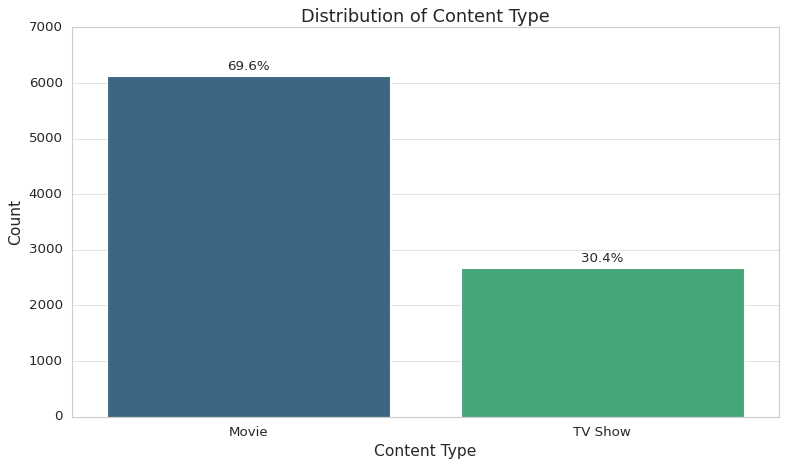

Content Type Counts:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Content Type Percentages:
type
Movie      69.6%
TV Show    30.4%
Name: proportion, dtype: object


In [18]:
# Content Type Distribution
plt.figure(figsize=(10, 6))
content_type_counts = netflix_df['type'].value_counts()
ax = sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')

# Add percentage labels
total = len(netflix_df)
for i, count in enumerate(content_type_counts.values):
    percentage = 100 * count / total
    ax.text(i, count + 100, f'{percentage:.1f}%', ha='center')

plt.title('Distribution of Content Type', fontsize=16)
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Display the numerical breakdown
print('Content Type Counts:')
print(content_type_counts)
print('\nContent Type Percentages:')
print(netflix_df['type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

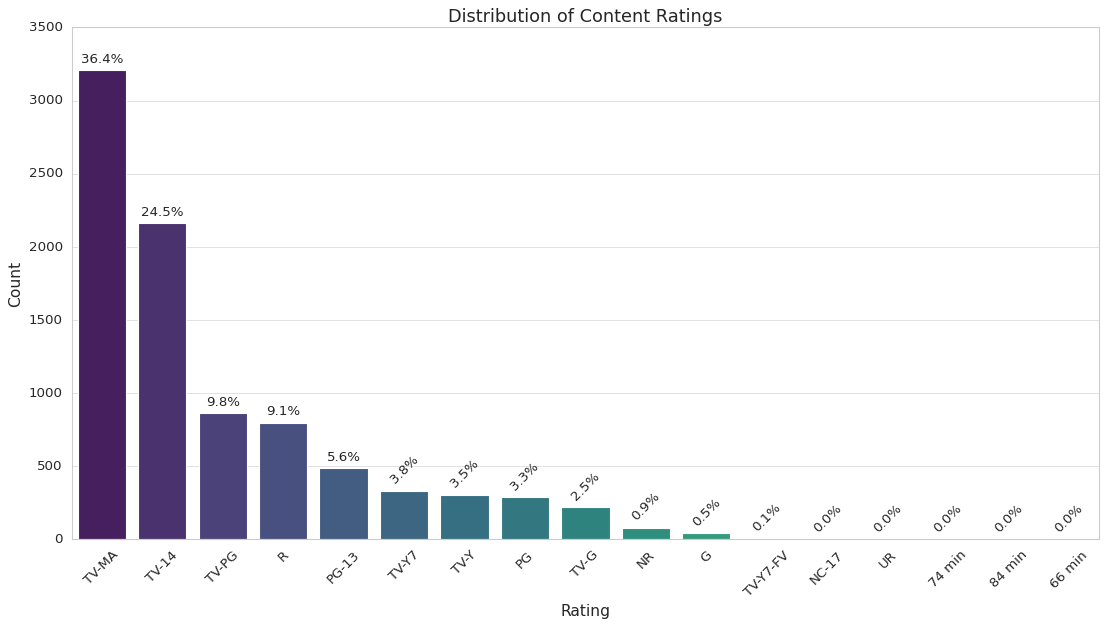

Rating Counts:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Rating Percentages:
rating
TV-MA       36.4%
TV-14       24.5%
TV-PG        9.8%
R            9.1%
PG-13        5.6%
TV-Y7        3.8%
TV-Y         3.5%
PG           3.3%
TV-G         2.5%
NR           0.9%
G            0.5%
TV-Y7-FV     0.1%
NC-17        0.0%
UR           0.0%
74 min       0.0%
84 min       0.0%
66 min       0.0%
Name: proportion, dtype: object


In [19]:
# Rating Distribution
plt.figure(figsize=(14, 8))
rating_counts = netflix_df['rating'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Add percentage labels
total = len(netflix_df)
for i, count in enumerate(rating_counts.values):
    percentage = 100 * count / total
    ax.text(i, count + 50, f'{percentage:.1f}%', ha='center', rotation=45 if percentage < 5 else 0)

plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the numerical breakdown
print('Rating Counts:')
print(rating_counts)
print('\nRating Percentages:')
print(netflix_df['rating'].value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).astype(str) + '%')

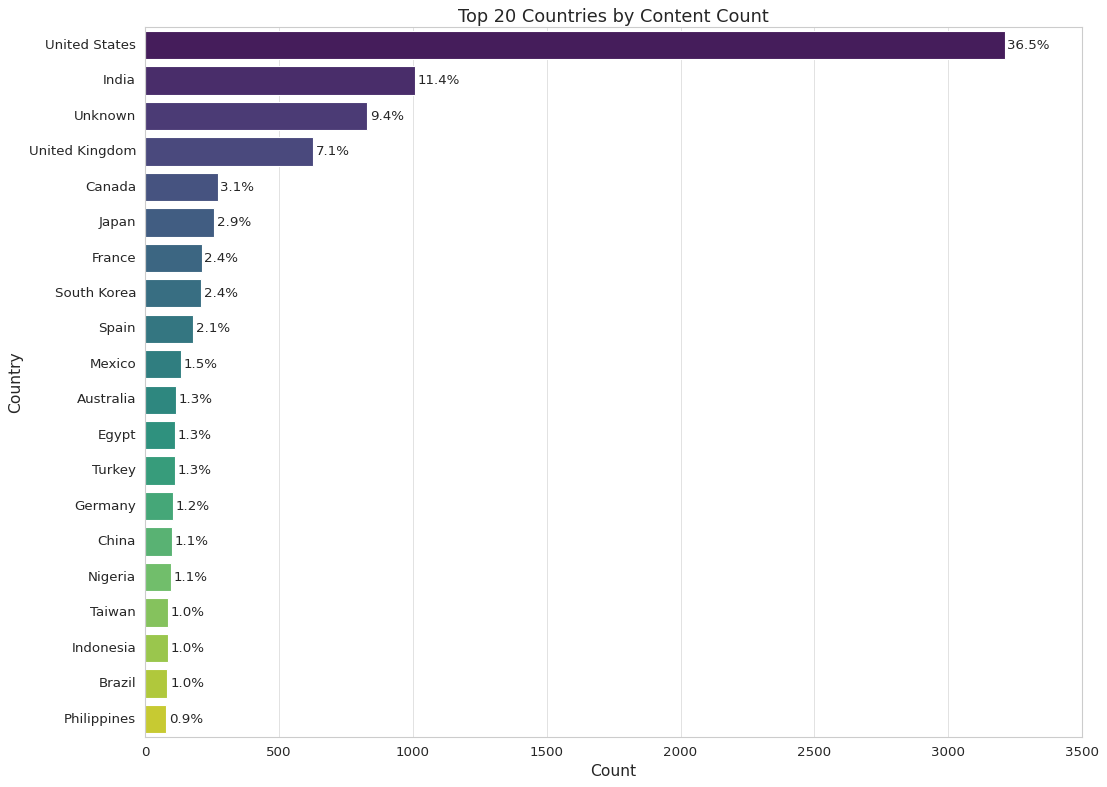

Top 20 Countries Counts:
primary_country
United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Egypt              112
Turkey             111
Germany            103
China              100
Nigeria             96
Taiwan              85
Indonesia           85
Brazil              84
Philippines         80
Name: count, dtype: int64


In [20]:
# Top 20 Countries
plt.figure(figsize=(14, 10))
country_counts = netflix_df['primary_country'].value_counts().head(20)
ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')

# Add percentage labels
total = len(netflix_df)
for i, count in enumerate(country_counts.values):
    percentage = 100 * count / total
    ax.text(count + 10, i, f'{percentage:.1f}%', va='center')

plt.title('Top 20 Countries by Content Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

# Display the numerical breakdown
print('Top 20 Countries Counts:')
print(country_counts)

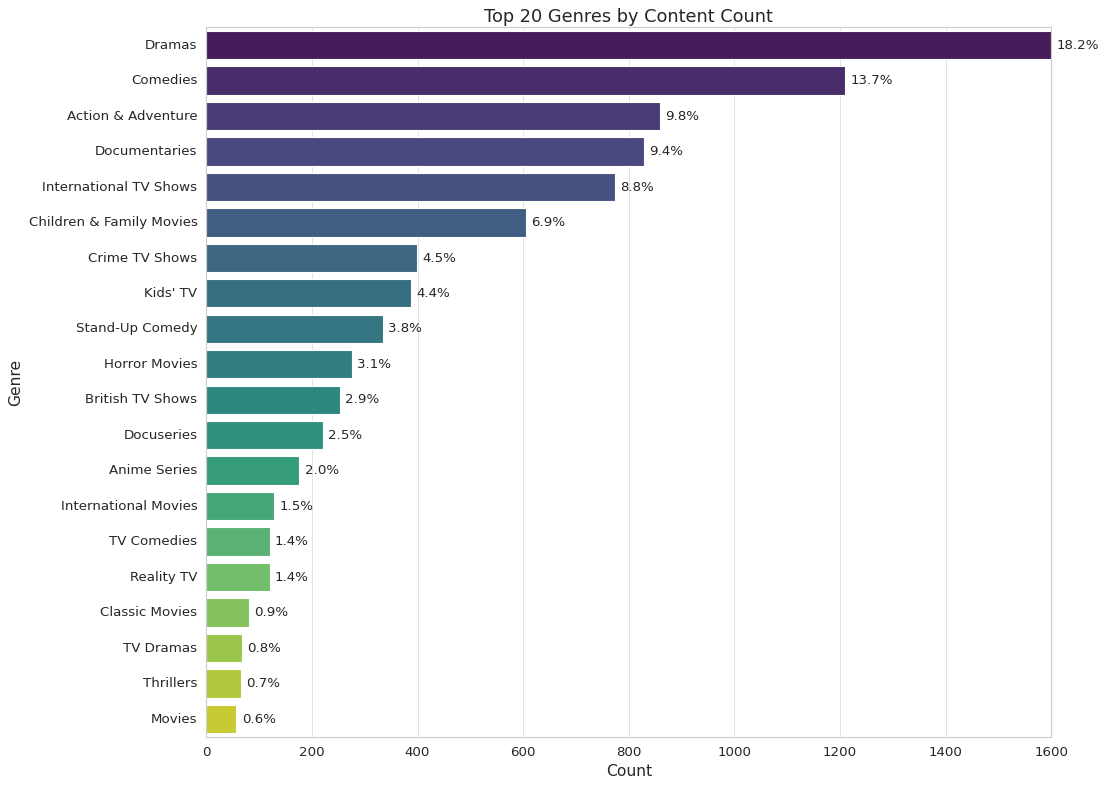

Top 20 Genres Counts:
primary_genre
Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       774
Children & Family Movies     605
Crime TV Shows               399
Kids' TV                     388
Stand-Up Comedy              334
Horror Movies                275
British TV Shows             253
Docuseries                   221
Anime Series                 176
International Movies         128
TV Comedies                  120
Reality TV                   120
Classic Movies                80
TV Dramas                     67
Thrillers                     65
Movies                        57
Name: count, dtype: int64


In [21]:
# Top 20 Genres
plt.figure(figsize=(14, 10))
genre_counts = netflix_df['primary_genre'].value_counts().head(20)
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')

# Add percentage labels
total = len(netflix_df)
for i, count in enumerate(genre_counts.values):
    percentage = 100 * count / total
    ax.text(count + 10, i, f'{percentage:.1f}%', va='center')

plt.title('Top 20 Genres by Content Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.tight_layout()
plt.show()

# Display the numerical breakdown
print('Top 20 Genres Counts:')
print(genre_counts)

### 6.2 Numerical Features Analysis

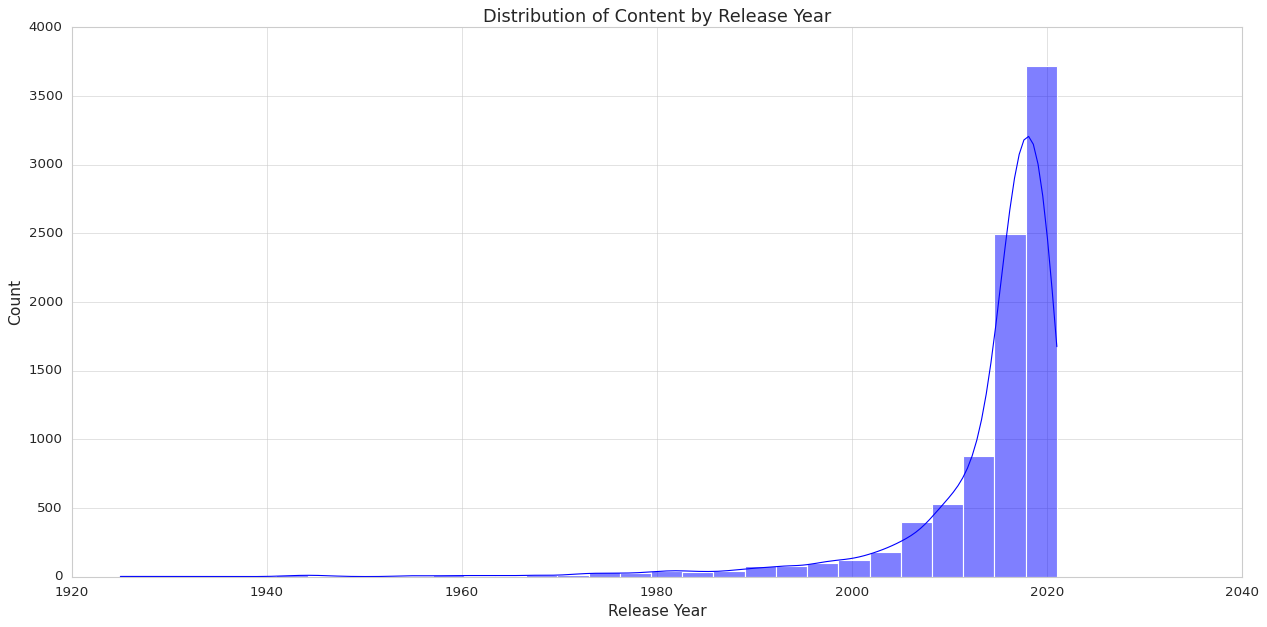

Release Year Statistics:
count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


In [22]:
# Release Year Distribution
plt.figure(figsize=(16, 8))
sns.histplot(data=netflix_df, x='release_year', bins=30, kde=True)
plt.title('Distribution of Content by Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Statistical summary of release year
print("Release Year Statistics:")
print(netflix_df['release_year'].describe())

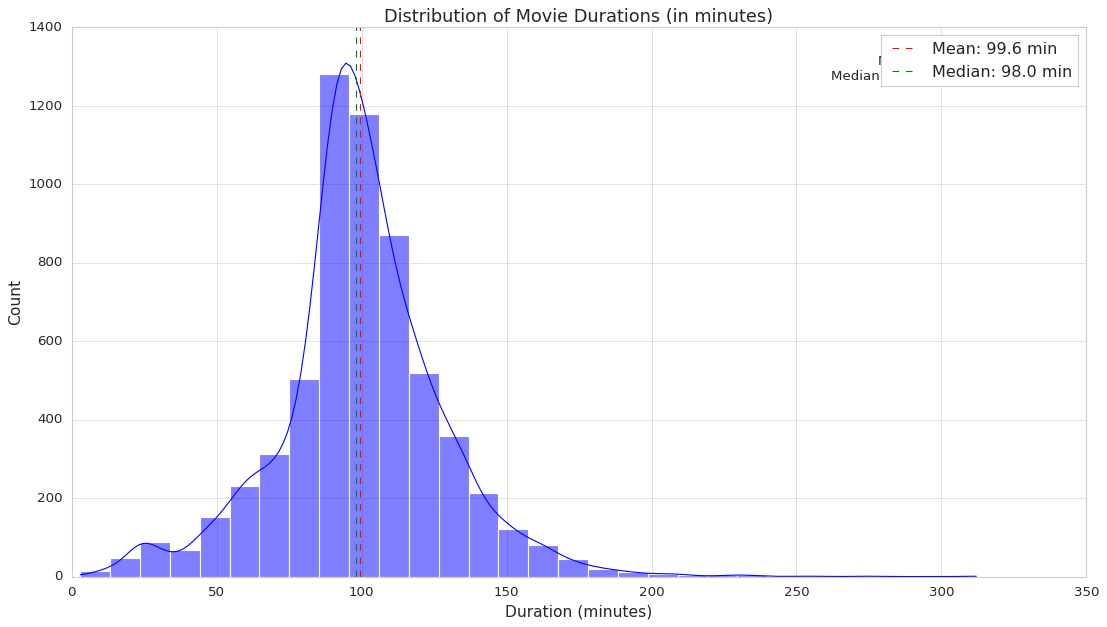

Movie Duration Statistics (in minutes):
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64


In [23]:
# Movie Duration Distribution (in minutes)
plt.figure(figsize=(14, 8))
movie_durations = netflix_df[netflix_df['type'] == 'Movie']['duration_min'].dropna()

# Plotting
sns.histplot(movie_durations, bins=30, kde=True)
plt.axvline(movie_durations.mean(), color='red', linestyle='--', label=f'Mean: {movie_durations.mean():.1f} min')
plt.axvline(movie_durations.median(), color='green', linestyle='--', label=f'Median: {movie_durations.median():.1f} min')

# Mathematics explanation for Mean and Median
plt.text(0.95, 0.95,
         f"Mean (μ) = Σx/n = {movie_durations.mean():.1f}\n" +
         f"Median = middle value = {movie_durations.median():.1f}",
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8),
         horizontalalignment='right',
         verticalalignment='top')

plt.title('Distribution of Movie Durations (in minutes)', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Statistical summary of movie durations
print("Movie Duration Statistics (in minutes):")
print(movie_durations.describe())

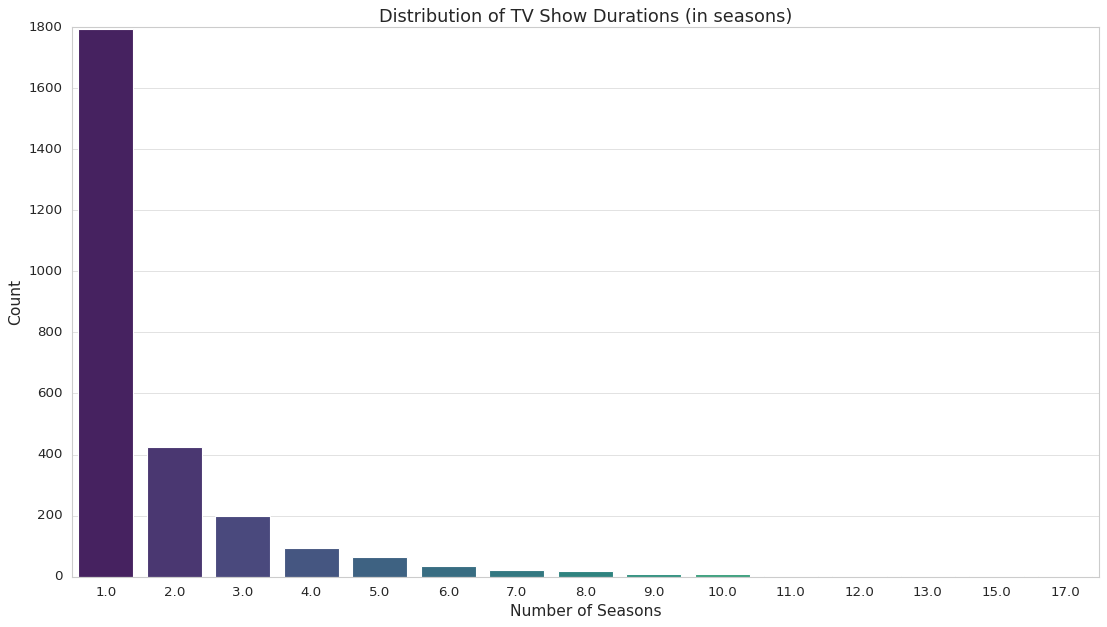

TV Show Duration Statistics (in seasons):
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_seasons, dtype: float64

TV Show Seasons Counts:
duration_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
11.0       2
12.0       2
13.0       3
15.0       2
17.0       1
Name: count, dtype: int64


In [24]:
# TV Show Duration Distribution (in seasons)
plt.figure(figsize=(14, 8))
tv_durations = netflix_df[netflix_df['type'] == 'TV Show']['duration_seasons'].dropna()

# Plotting
sns.countplot(x=tv_durations, palette='viridis')

plt.title('Distribution of TV Show Durations (in seasons)', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Statistical summary of TV show durations
print("TV Show Duration Statistics (in seasons):")
print(tv_durations.describe())
print("\nTV Show Seasons Counts:")
print(tv_durations.value_counts().sort_index())

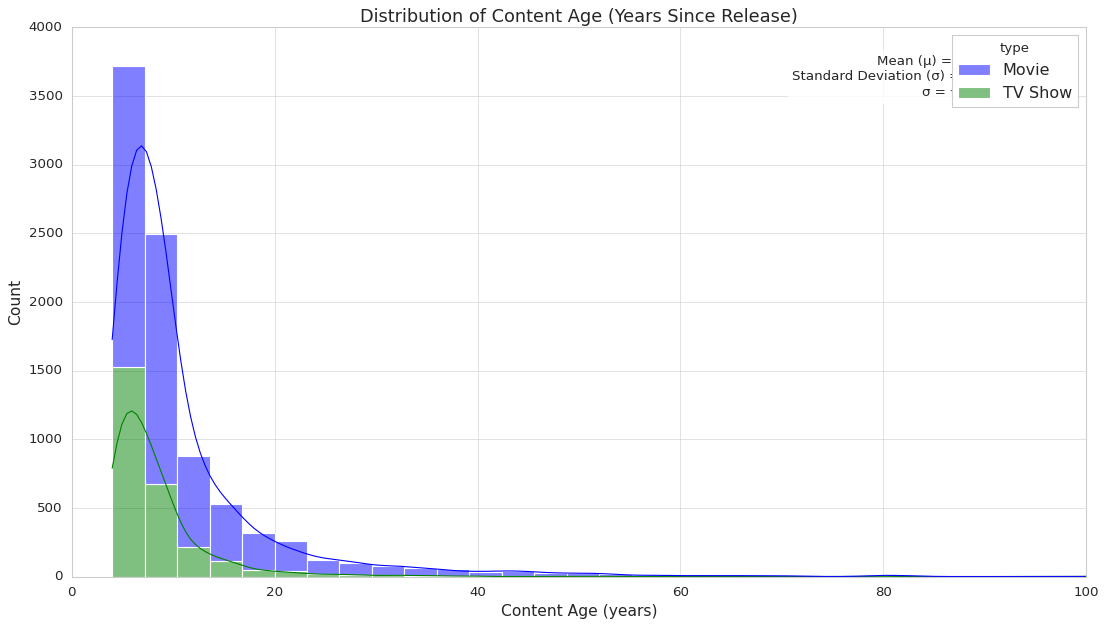

Content Age Statistics (in years):
count    8807.000000
mean       10.819802
std         8.819312
min         4.000000
25%         6.000000
50%         8.000000
75%        12.000000
max       100.000000
Name: content_age, dtype: float64


In [25]:
# Content Age Distribution (years since release)
plt.figure(figsize=(14, 8))
sns.histplot(data=netflix_df, x='content_age', bins=30, kde=True, hue='type', multiple='stack')

# Calculate standard deviation
std_dev = netflix_df['content_age'].std()
mean_age = netflix_df['content_age'].mean()

# Annotation with mathematical formula for standard deviation
plt.text(0.95, 0.95,
         f"Mean (μ) = {mean_age:.2f} years\n" +
         f"Standard Deviation (σ) = {std_dev:.2f} years\n" +
         "σ = √(Σ(x - μ)²/n)",
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8),
         horizontalalignment='right',
         verticalalignment='top')

plt.title('Distribution of Content Age (Years Since Release)', fontsize=16)
plt.xlabel('Content Age (years)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# Statistical summary of content age
print("Content Age Statistics (in years):")
print(netflix_df['content_age'].describe())

### 6.3 Time Series Analysis

<Figure size 1280x640 with 0 Axes>

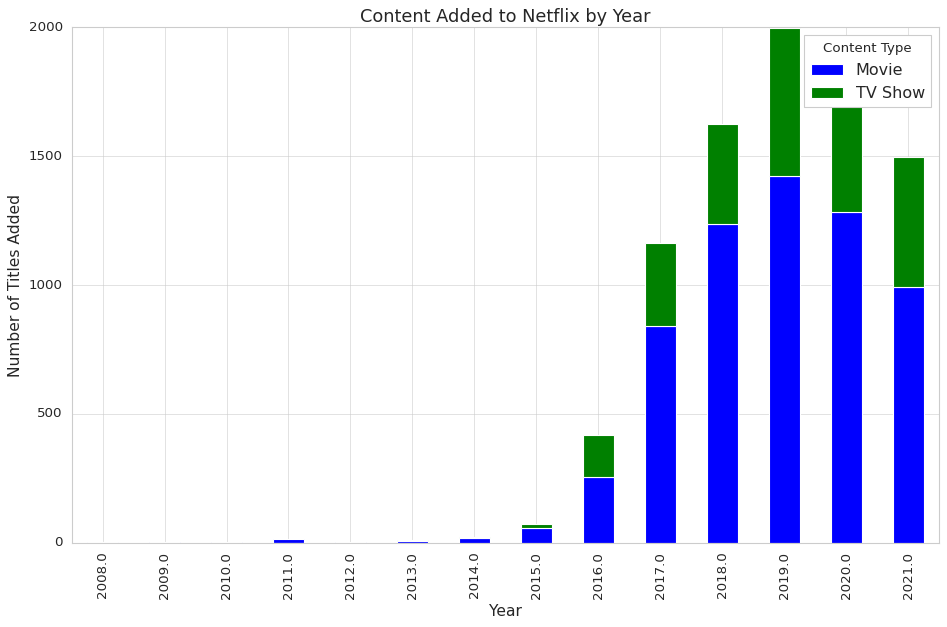

Content Added by Year:
type         Movie  TV Show
year_added                 
2008.0         1.0      1.0
2009.0         2.0      0.0
2010.0         1.0      0.0
2011.0        13.0      0.0
2012.0         3.0      0.0
2013.0         6.0      4.0
2014.0        19.0      4.0
2015.0        56.0     17.0
2016.0       253.0    165.0
2017.0       839.0    325.0
2018.0      1237.0    388.0
2019.0      1424.0    575.0
2020.0      1284.0    594.0
2021.0       993.0    505.0


In [26]:
# Content added over time (by year)
plt.figure(figsize=(16, 8))
yearly_additions = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plot
yearly_additions.plot(kind='bar', stacked=True)
plt.title('Content Added to Netflix by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

# Display numerical data
print("Content Added by Year:")
print(yearly_additions)

<Figure size 1120x640 with 0 Axes>

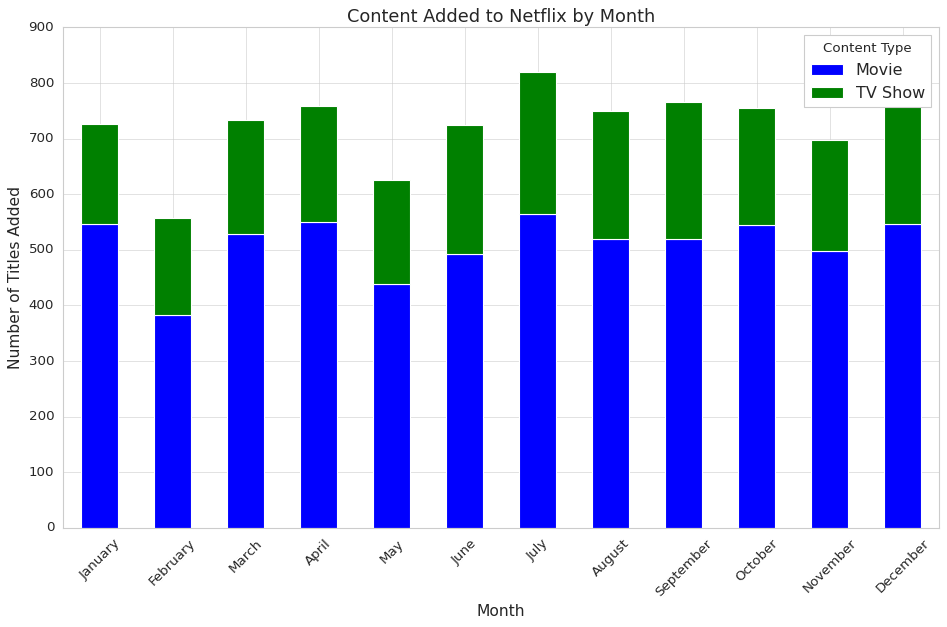

Content Added by Month:
type              Movie  TV Show
month_name_added                
January             546      181
February            382      175
March               529      205
April               550      209
May                 439      187
June                492      232
July                565      254
August              519      230
September           519      246
October             545      210
November            498      199
December            547      250


In [27]:
# Content added by month
plt.figure(figsize=(14, 8))
monthly_additions = netflix_df.groupby(['month_name_added', 'type']).size().unstack().fillna(0)

# Reorder months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_additions = monthly_additions.reindex(month_order)

# Plot
monthly_additions.plot(kind='bar', stacked=True)
plt.title('Content Added to Netflix by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Titles Added', fontsize=14)
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display numerical data
print("Content Added by Month:")
print(monthly_additions)

### 6.4 Correlation Analysis

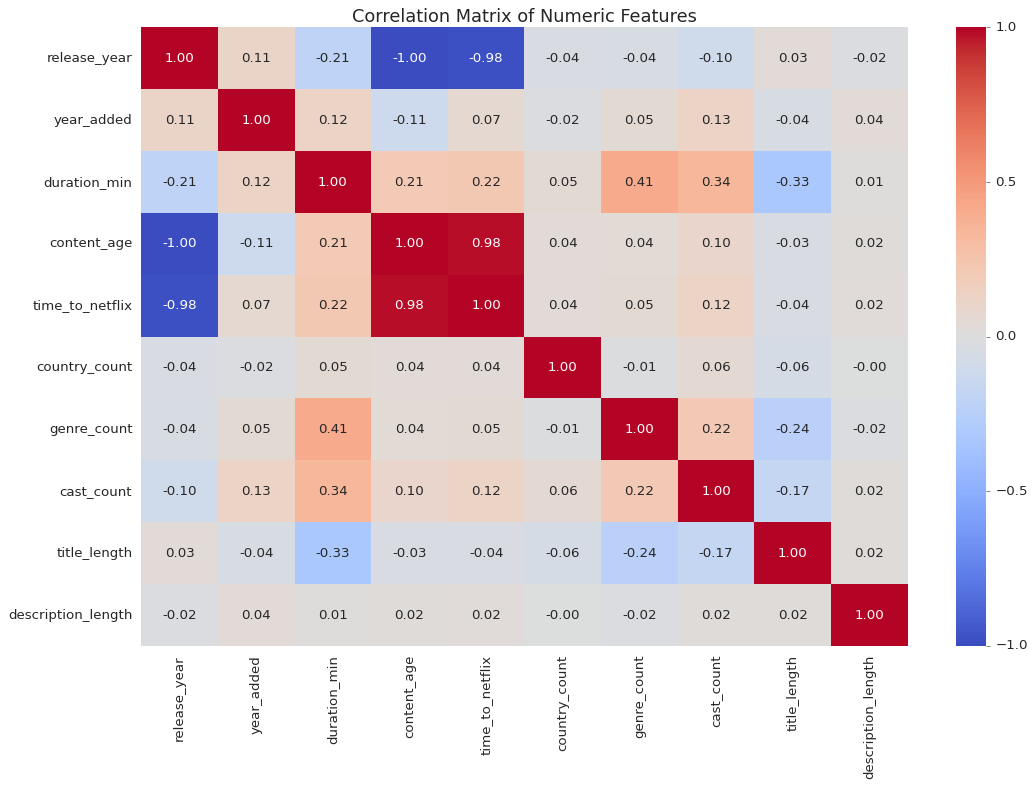


Pearson Correlation Coefficient Mathematical Formula:
r = Σ[(xi - x̄)(yi - ȳ)] / √[Σ(xi - x̄)² × Σ(yi - ȳ)²]
Where:
- xi and yi are individual data points
- x̄ and ȳ are the means of the variables
- r ranges from -1 to 1, where:
  * r = 1 indicates perfect positive correlation
  * r = 0 indicates no correlation
  * r = -1 indicates perfect negative correlation


In [28]:
# Select numeric columns for correlation analysis
numeric_cols = ['release_year', 'year_added', 'duration_min', 'content_age',
                'time_to_netflix', 'country_count', 'genre_count',
                'cast_count', 'title_length', 'description_length']

# Create a correlation matrix
corr_matrix = netflix_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Mathematical explanation of Pearson correlation coefficient
print("\nPearson Correlation Coefficient Mathematical Formula:")
print("r = Σ[(xi - x̄)(yi - ȳ)] / √[Σ(xi - x̄)² × Σ(yi - ȳ)²]")
print("Where:")
print("- xi and yi are individual data points")
print("- x̄ and ȳ are the means of the variables")
print("- r ranges from -1 to 1, where:")
print("  * r = 1 indicates perfect positive correlation")
print("  * r = 0 indicates no correlation")
print("  * r = -1 indicates perfect negative correlation")

### 6.5 Relationship Analysis

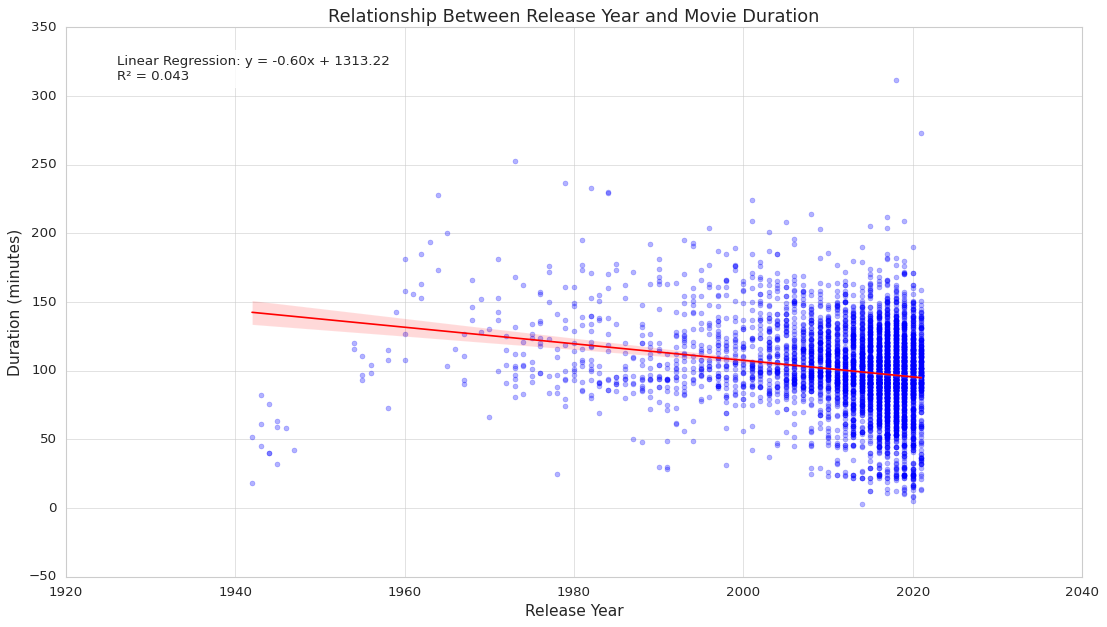


Linear Regression Mathematical Formula:
y = mx + b
Where:
- y is the dependent variable (duration)
- x is the independent variable (release year)
- m is the slope (-0.60)
- b is the y-intercept (1313.22)

Coefficient of Determination (R²) Mathematical Formula:
R² = 1 - (SSresidual / SStotal)
Where:
- SSresidual is the sum of squares of residuals
- SStotal is the total sum of squares
- R² value of 0.043 means that 4.3% of the variation in movie duration
  can be explained by the release year.


In [29]:
# Relationship between release year and movie duration
plt.figure(figsize=(14, 8))
movies_df = netflix_df[netflix_df['type'] == 'Movie'].dropna(subset=['duration_min'])

# Create scatter plot with regression line
sns.regplot(x='release_year', y='duration_min', data=movies_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

# Add regression equation
# Calculate regression line manually
x = movies_df['release_year']
y = movies_df['duration_min']
m, b = np.polyfit(x, y, 1)
r_squared = np.corrcoef(x, y)[0, 1]**2

plt.text(0.05, 0.95,
         f"Linear Regression: y = {m:.2f}x + {b:.2f}\n" +
         f"R² = {r_squared:.3f}",
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8),
         horizontalalignment='left',
         verticalalignment='top')

plt.title('Relationship Between Release Year and Movie Duration', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)
plt.tight_layout()
plt.show()

# Mathematical explanation of linear regression
print("\nLinear Regression Mathematical Formula:")
print("y = mx + b")
print("Where:")
print("- y is the dependent variable (duration)")
print("- x is the independent variable (release year)")
print(f"- m is the slope ({m:.2f})")
print(f"- b is the y-intercept ({b:.2f})")
print("\nCoefficient of Determination (R²) Mathematical Formula:")
print("R² = 1 - (SSresidual / SStotal)")
print("Where:")
print("- SSresidual is the sum of squares of residuals")
print("- SStotal is the total sum of squares")
print(f"- R² value of {r_squared:.3f} means that {r_squared*100:.1f}% of the variation in movie duration")
print("  can be explained by the release year.")

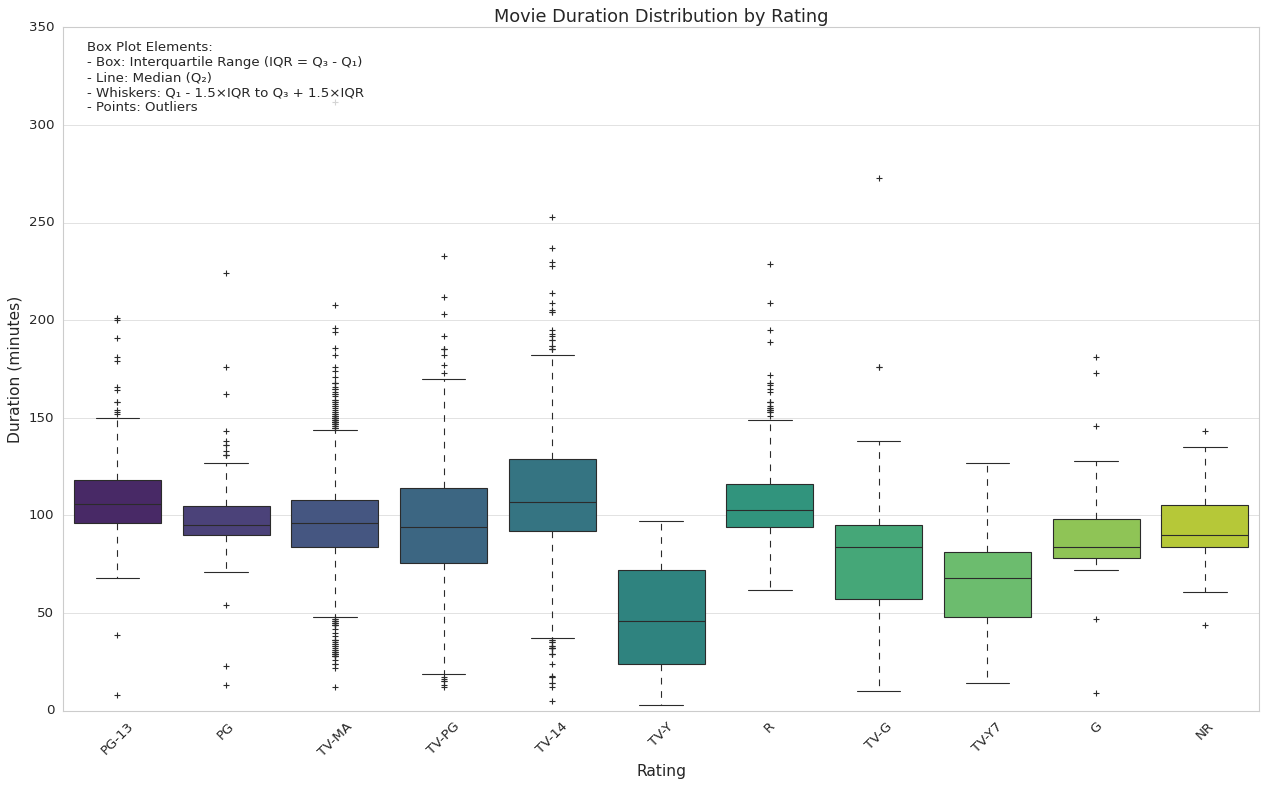

Movie Duration Statistics by Rating:
         count        mean        std   min    25%    50%    75%    max
rating                                                                 
G         41.0   90.268293  28.344333   9.0  78.00   84.0   98.0  181.0
NR        75.0   94.533333  17.987483  44.0  84.00   90.0  105.5  143.0
PG       287.0   98.282230  17.283945  13.0  90.00   95.0  105.0  224.0
PG-13    490.0  108.330612  19.204232   8.0  96.00  106.0  118.0  201.0
R        797.0  106.720201  18.347929  62.0  94.00  103.0  116.0  229.0
TV-14   1427.0  110.290820  30.673441   5.0  92.00  107.0  129.0  253.0
TV-G     126.0   79.666667  33.923443  10.0  57.25   84.0   95.0  273.0
TV-MA   2062.0   95.889913  24.056863  12.0  84.00   96.0  108.0  312.0
TV-PG    540.0   94.851852  34.112445  12.0  75.75   94.0  114.0  233.0
TV-Y     131.0   48.114504  23.714209   3.0  24.00   46.0   72.0   97.0
TV-Y7    139.0   66.287770  23.666231  14.0  48.00   68.0   81.5  127.0


In [30]:
# Box plot of movie durations by rating
plt.figure(figsize=(16, 10))
# Filter to include only common ratings (with at least 30 movies) to avoid clutter
common_ratings = movies_df['rating'].value_counts()[movies_df['rating'].value_counts() >= 30].index.tolist()
common_rating_movies = movies_df[movies_df['rating'].isin(common_ratings)]

# Create box plot
sns.boxplot(x='rating', y='duration_min', data=common_rating_movies, palette='viridis')

# Add mathematical notation for box plot elements
plt.text(0.02, 0.98,
         "Box Plot Elements:\n" +
         "- Box: Interquartile Range (IQR = Q₃ - Q₁)\n" +
         "- Line: Median (Q₂)\n" +
         "- Whiskers: Q₁ - 1.5×IQR to Q₃ + 1.5×IQR\n" +
         "- Points: Outliers",
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8),
         horizontalalignment='left',
         verticalalignment='top')

plt.title('Movie Duration Distribution by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical summary by rating
print("Movie Duration Statistics by Rating:")
duration_by_rating = common_rating_movies.groupby('rating')['duration_min'].describe()
print(duration_by_rating)

### 6.6 Content Analysis

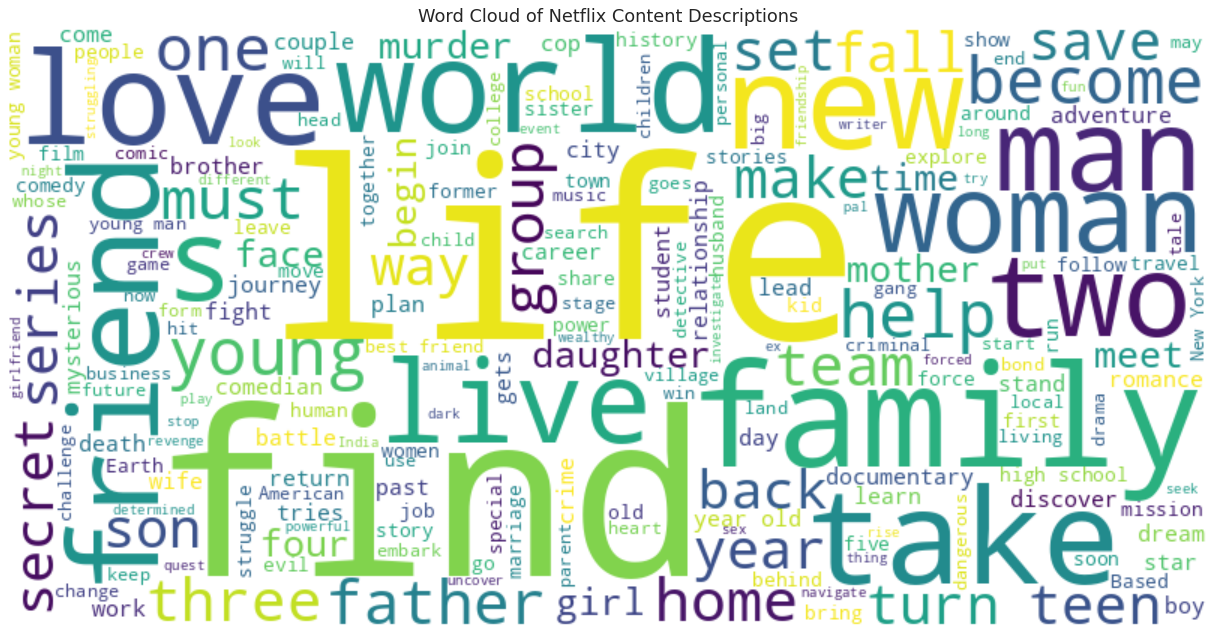

In [31]:
# Word cloud for movie descriptions
plt.figure(figsize=(16, 8))

# Combine all descriptions
all_descriptions = ' '.join(netflix_df['description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_descriptions)

# Display word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Content Descriptions', fontsize=16)
plt.tight_layout()
plt.show()

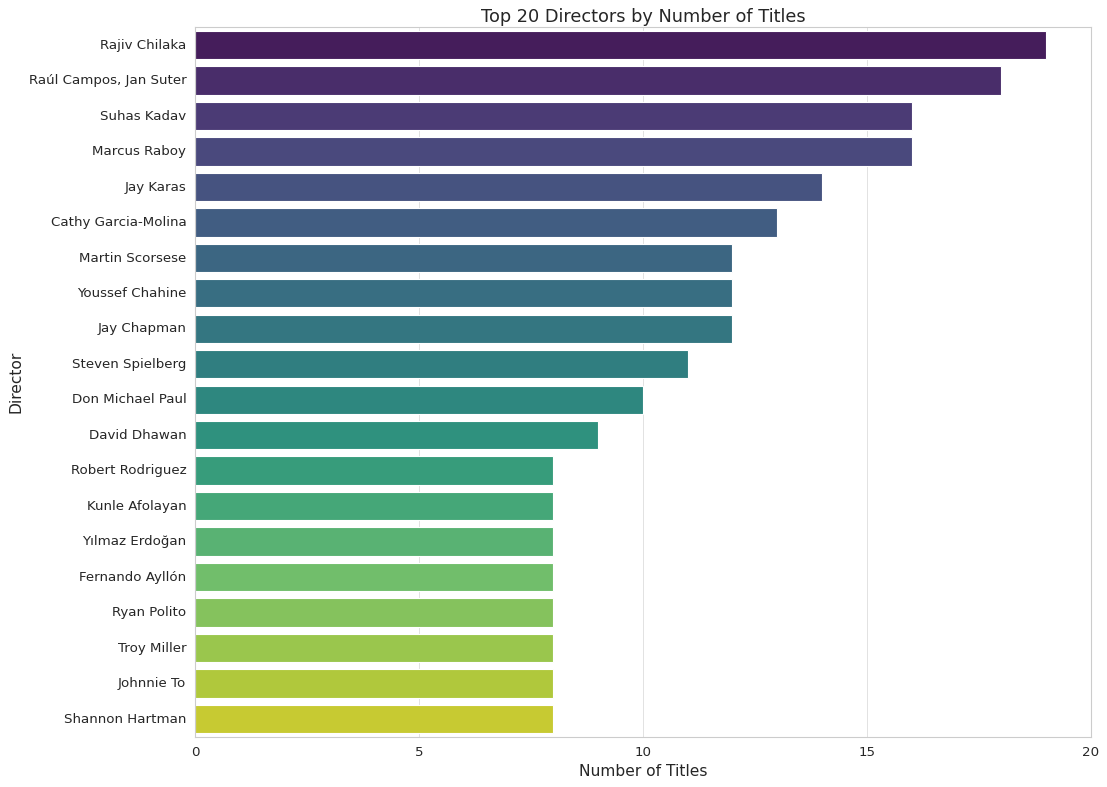

Top 20 Directors by Number of Titles:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Robert Rodriguez           8
Kunle Afolayan             8
Yılmaz Erdoğan             8
Fernando Ayllón            8
Ryan Polito                8
Troy Miller                8
Johnnie To                 8
Shannon Hartman            8
Name: count, dtype: int64


In [32]:
# Top directors by number of titles
plt.figure(figsize=(14, 10))
# Exclude 'Unknown' directors
directors_df = netflix_df[netflix_df['director'] != 'Unknown']
top_directors = directors_df['director'].value_counts().head(20)

# Plot
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 20 Directors by Number of Titles', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.tight_layout()
plt.show()

# Display numerical data
print("Top 20 Directors by Number of Titles:")
print(top_directors)

### 6.7 Genre Analysis

<Figure size 1120x800 with 0 Axes>

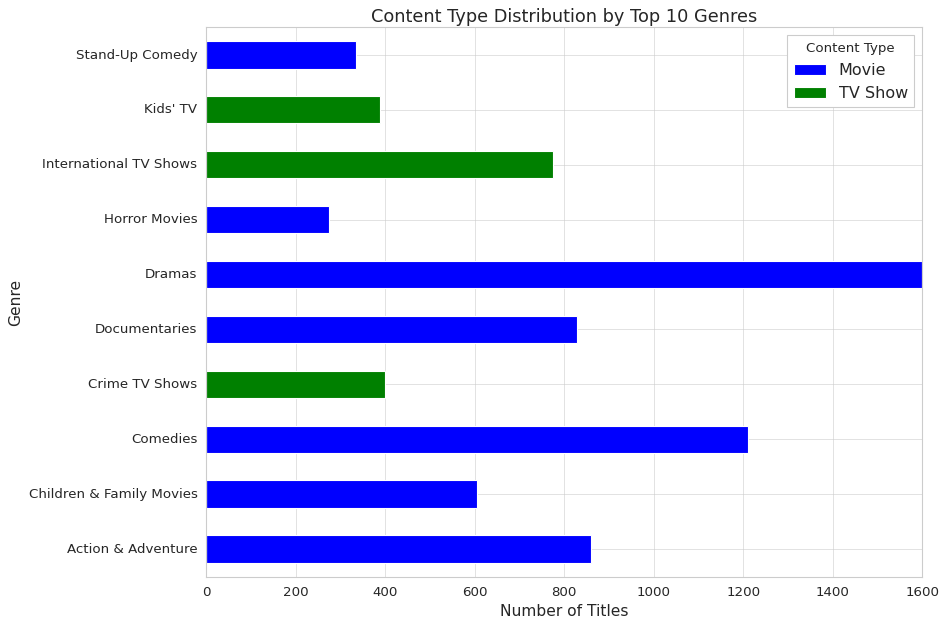

<Figure size 1120x800 with 0 Axes>

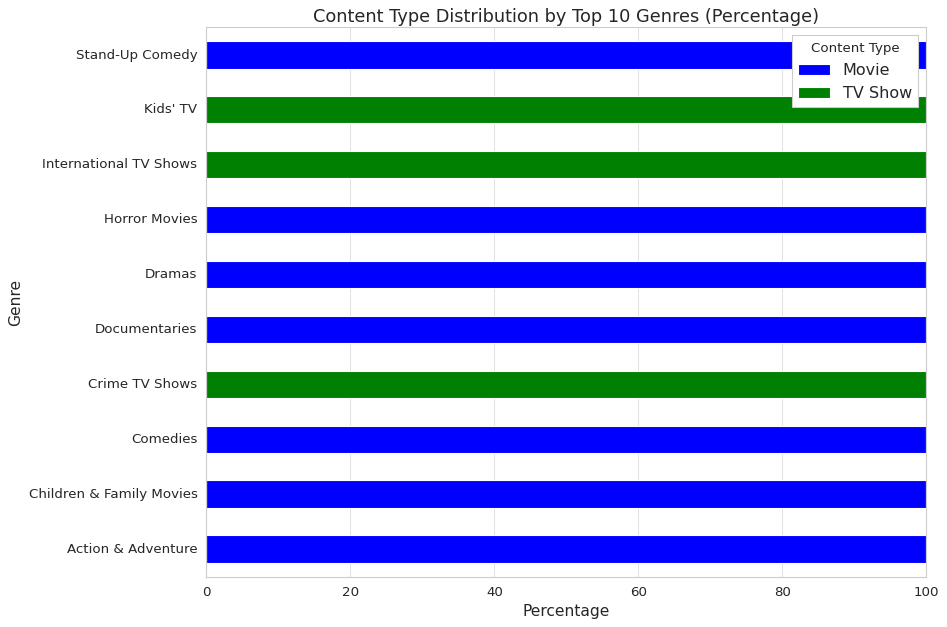

Content Count by Genre and Type:
type                      Movie  TV Show
primary_genre                           
Action & Adventure          859        0
Children & Family Movies    605        0
Comedies                   1210        0
Crime TV Shows                0      399
Documentaries               829        0
Dramas                     1600        0
Horror Movies               275        0
International TV Shows        0      774
Kids' TV                      0      388
Stand-Up Comedy             334        0

Content Percentage by Genre and Type:
type                      Movie  TV Show
primary_genre                           
Action & Adventure        100.0      0.0
Children & Family Movies  100.0      0.0
Comedies                  100.0      0.0
Crime TV Shows              0.0    100.0
Documentaries             100.0      0.0
Dramas                    100.0      0.0
Horror Movies             100.0      0.0
International TV Shows      0.0    100.0
Kids' TV                  

In [33]:
# Genre distribution by type (Movie vs TV Show)
plt.figure(figsize=(14, 10))

# Get top 10 genres for analysis
top_genres = netflix_df['primary_genre'].value_counts().head(10).index.tolist()
top_genre_df = netflix_df[netflix_df['primary_genre'].isin(top_genres)]

# Create cross-tabulation
genre_type_counts = pd.crosstab(top_genre_df['primary_genre'], top_genre_df['type'])
genre_type_pct = genre_type_counts.div(genre_type_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
genre_type_counts.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Content Type Distribution by Top 10 Genres', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

# Also plot percentage distribution
plt.figure(figsize=(14, 10))
genre_type_pct.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Content Type Distribution by Top 10 Genres (Percentage)', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

# Display numerical data
print("Content Count by Genre and Type:")
print(genre_type_counts)
print("\nContent Percentage by Genre and Type:")
print(genre_type_pct.round(1))

### 6.8 Rating Distribution Analysis

<Figure size 1280x800 with 0 Axes>

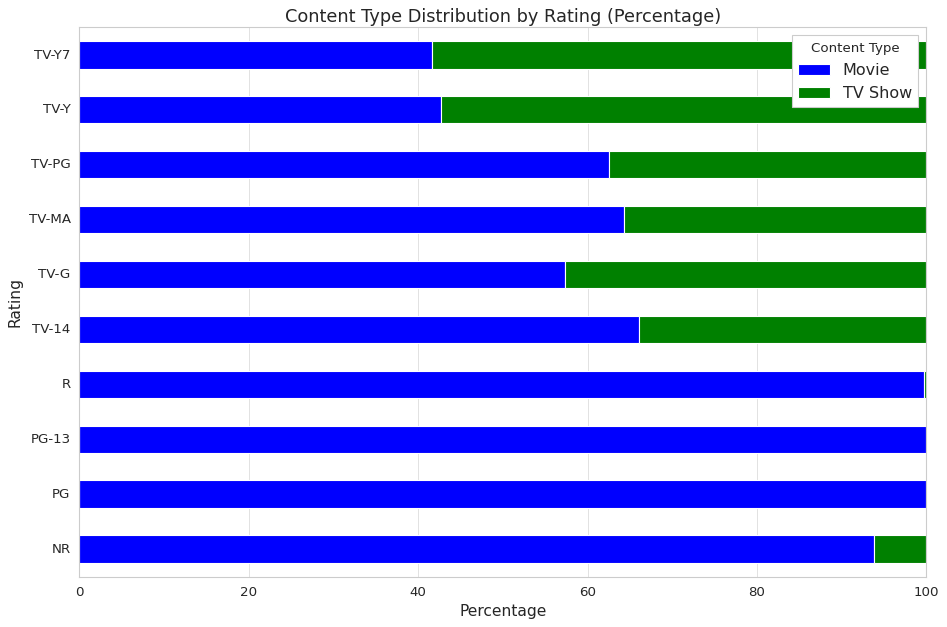

Content Percentage by Rating and Type:
type    Movie  TV Show
rating                
NR       93.8      6.2
PG      100.0      0.0
PG-13   100.0      0.0
R        99.7      0.3
TV-14    66.1     33.9
TV-G     57.3     42.7
TV-MA    64.3     35.7
TV-PG    62.6     37.4
TV-Y     42.7     57.3
TV-Y7    41.6     58.4


In [34]:
# Rating distribution by content type
plt.figure(figsize=(16, 10))

# Get common ratings for analysis
common_ratings = netflix_df['rating'].value_counts()[netflix_df['rating'].value_counts() >= 50].index.tolist()
common_ratings_df = netflix_df[netflix_df['rating'].isin(common_ratings)]

# Create cross-tabulation
rating_type_counts = pd.crosstab(common_ratings_df['rating'], common_ratings_df['type'])
rating_type_pct = rating_type_counts.div(rating_type_counts.sum(axis=1), axis=0) * 100

# Plot percentage distribution
rating_type_pct.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Content Type Distribution by Rating (Percentage)', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

# Display numerical data
print("Content Percentage by Rating and Type:")
print(rating_type_pct.round(1))

### 6.9 Regional Content Analysis

<Figure size 1280x800 with 0 Axes>

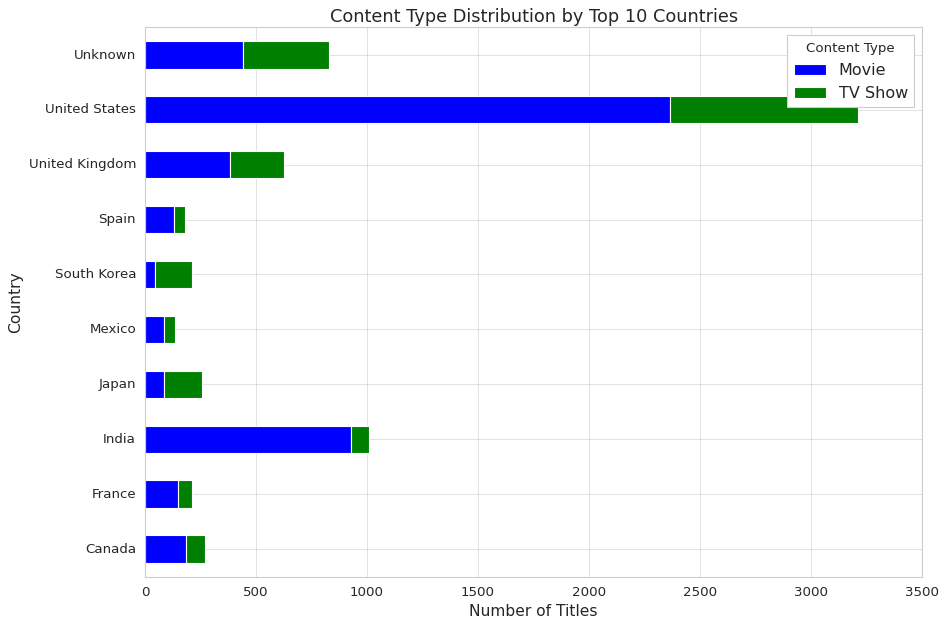

Content Count by Country and Type:
type             Movie  TV Show
primary_country                
Canada             187       84
France             148       64
India              927       81
Japan               85      174
Mexico              86       48
South Korea         47      164
Spain              129       52
United Kingdom     382      246
United States     2364      847
Unknown            440      391

Content Percentage by Country and Type:
type             Movie  TV Show
primary_country                
Canada            69.0     31.0
France            69.8     30.2
India             92.0      8.0
Japan             32.8     67.2
Mexico            64.2     35.8
South Korea       22.3     77.7
Spain             71.3     28.7
United Kingdom    60.8     39.2
United States     73.6     26.4
Unknown           52.9     47.1


In [35]:
# Content by country and type
plt.figure(figsize=(16, 10))

# Get top 10 countries for analysis
top_countries = netflix_df['primary_country'].value_counts().head(10).index.tolist()
top_country_df = netflix_df[netflix_df['primary_country'].isin(top_countries)]

# Create cross-tabulation
country_type_counts = pd.crosstab(top_country_df['primary_country'], top_country_df['type'])
country_type_pct = country_type_counts.div(country_type_counts.sum(axis=1), axis=0) * 100

# Plot
country_type_counts.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Content Type Distribution by Top 10 Countries', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

# Display numerical data
print("Content Count by Country and Type:")
print(country_type_counts)
print("\nContent Percentage by Country and Type:")
print(country_type_pct.round(1))

### 6.10 Content Addition Trends

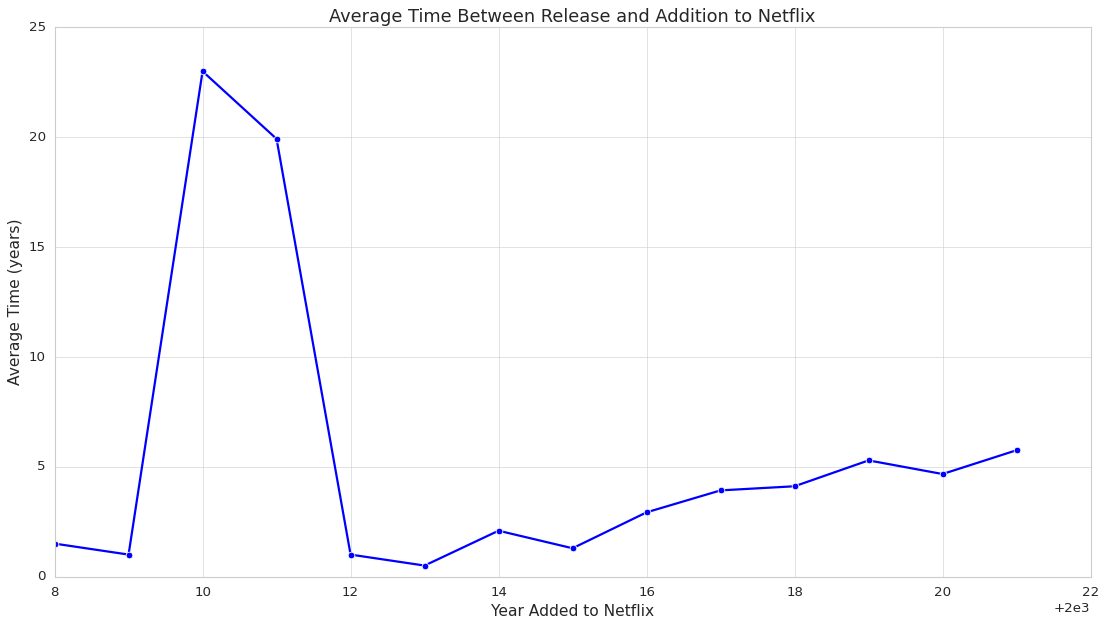

Average Time Between Release and Addition to Netflix by Year:
year_added
2008.0     1.50
2009.0     1.00
2010.0    23.00
2011.0    19.92
2012.0     1.00
2013.0     0.50
2014.0     2.09
2015.0     1.29
2016.0     2.92
2017.0     3.92
2018.0     4.11
2019.0     5.29
2020.0     4.67
2021.0     5.75
Name: time_to_netflix, dtype: float64


In [36]:
# Time to Netflix trend (time between release and addition to Netflix)
plt.figure(figsize=(14, 8))

# Group by year_added and calculate mean time_to_netflix
time_to_netflix_trend = netflix_df.groupby('year_added')['time_to_netflix'].mean()

# Plot
sns.lineplot(x=time_to_netflix_trend.index, y=time_to_netflix_trend.values, marker='o', linewidth=2)
plt.title('Average Time Between Release and Addition to Netflix', fontsize=16)
plt.xlabel('Year Added to Netflix', fontsize=14)
plt.ylabel('Average Time (years)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display numerical data
print("Average Time Between Release and Addition to Netflix by Year:")
print(time_to_netflix_trend.round(2))

### 6.11 Content Type Analysis Over Time

<Figure size 1120x640 with 0 Axes>

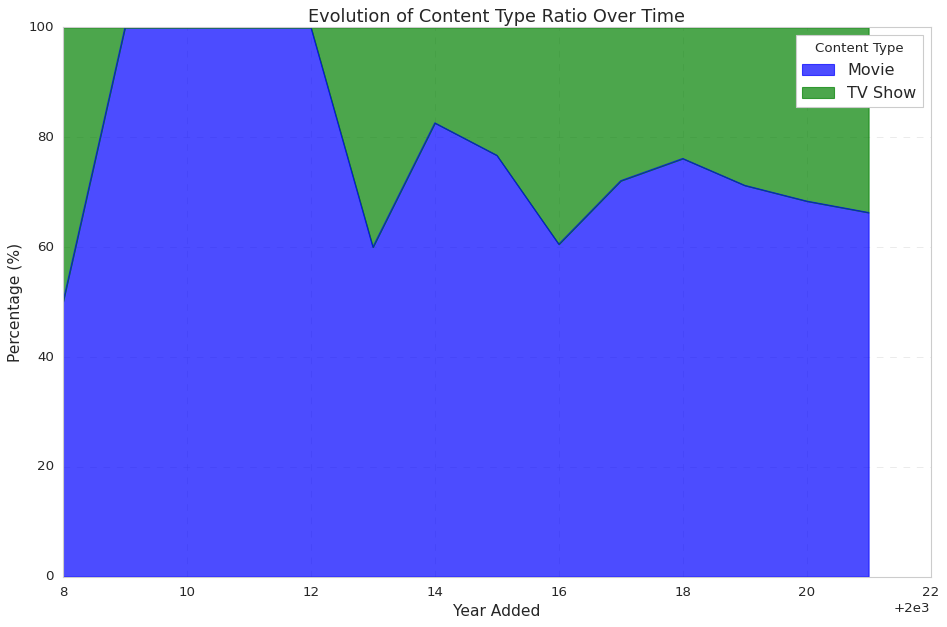

Content Type Percentage by Year:
type        Movie  TV Show
year_added                
2008.0       50.0     50.0
2009.0      100.0      0.0
2010.0      100.0      0.0
2011.0      100.0      0.0
2012.0      100.0      0.0
2013.0       60.0     40.0
2014.0       82.6     17.4
2015.0       76.7     23.3
2016.0       60.5     39.5
2017.0       72.1     27.9
2018.0       76.1     23.9
2019.0       71.2     28.8
2020.0       68.4     31.6
2021.0       66.3     33.7


In [37]:
# Evolution of content type ratio over years
plt.figure(figsize=(14, 8))

# Calculate percentage of each type by year
type_year_pct = pd.crosstab(netflix_df['year_added'], netflix_df['type'], normalize='index') * 100

# Plot
type_year_pct.plot(kind='area', stacked=True, alpha=0.7)
plt.title('Evolution of Content Type Ratio Over Time', fontsize=16)
plt.xlabel('Year Added', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Content Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display numerical data
print("Content Type Percentage by Year:")
print(type_year_pct.round(1))

## 7. Mathematical Formulas Explanations

### 7.1 Measures of Central Tendency

1. **Mean (μ)**: The arithmetic average of a set of values.
   - Formula: μ = (Σx) / n
   - Where:
     - Σx is the sum of all values
     - n is the number of values
   - Used in: Movie duration analysis, content age analysis

2. **Median**: The middle value in a sorted set of values.
   - For odd n: Middle value
   - For even n: Average of the two middle values
   - Used in: Movie duration analysis, box plots

3. **Mode**: The most frequently occurring value in a set.
   - Formula: Value with highest frequency
   - Used in: Rating distributions, genre analysis

### 7.2 Measures of Dispersion

1. **Standard Deviation (σ)**: Measures the amount of variation or dispersion in a set of values.
   - Formula: σ = √[(Σ(x - μ)²) / n]
   - Where:
     - x is each value
     - μ is the mean
     - n is the number of values
   - Used in: Content age analysis

2. **Variance (σ²)**: The square of the standard deviation.
   - Formula: σ² = (Σ(x - μ)²) / n
   - Used indirectly in standard deviation calculations

3. **Interquartile Range (IQR)**: The range between the first and third quartiles.
   - Formula: IQR = Q₃ - Q₁
   - Where:
     - Q₁ is the first quartile (25th percentile)
     - Q₃ is the third quartile (75th percentile)
   - Used in: Box plots of movie durations

### 7.3 Correlation and Regression

1. **Pearson Correlation Coefficient (r)**: Measures the linear correlation between two variables.
   - Formula: r = Σ[(xi - x̄)(yi - ȳ)] / √[Σ(xi - x̄)² × Σ(yi - ȳ)²]
   - Where:
     - xi and yi are individual data points
     - x̄ and ȳ are the means of the variables
   - Range: -1 (perfect negative correlation) to 1 (perfect positive correlation)
   - Used in: Correlation matrix analysis

2. **Linear Regression**: Models the relationship between a dependent variable and one or more independent variables.
   - Formula: y = mx + b
   - Where:
     - y is the dependent variable
     - x is the independent variable
     - m is the slope (coefficient)
     - b is the y-intercept
   - Used in: Analysis of release year vs. movie duration

3. **Coefficient of Determination (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
   - Formula: R² = 1 - (SSresidual / SStotal)
   - Where:
     - SSresidual is the sum of squares of residuals
     - SStotal is the total sum of squares
   - Range: 0 to 1 (higher is better)
   - Used in: Analysis of release year vs. movie duration

### 7.4 Probability and Distributions

1. **Histogram Probability Density**: Shows the distribution of a continuous variable.
   - Formula for bin probability: P(bin) = (count in bin) / (total count × bin width)
   - Used in: Movie duration distribution, content age distribution

2. **Kernel Density Estimation (KDE)**: A non-parametric way to estimate the probability density function of a random variable.
   - Formula: f̂(x) = (1/nh) Σ K((x - xi)/h)
   - Where:
     - K is the kernel function
     - h is the bandwidth parameter
     - xi are the data points
   - Used in: Distribution visualizations with KDE overlay

### 7.5 Normalization and Percentages

1. **Percentage Calculation**: Expresses a value as a fraction of 100.
   - Formula: Percentage = (value / total) × 100%
   - Used in: Content type distributions, rating distributions, etc.

2. **Row/Column Normalization**: Divides values by their row or column sum.
   - Formula for row normalization: normalized_value = value / row_sum
   - Used in: Percentage distributions of genres by type, countries by type, etc.


## 8. Conclusion and Insights

# Penjelasan Persamaan Matematika dalam Analisis Data

## 1. Ukuran Pemusatan Data

### 1.1 Rata-rata (Mean - μ)
Rata-rata adalah jumlah semua nilai dalam kumpulan data dibagi dengan jumlah total data.

**Rumus**:
```
μ = (Σx) / n
```

**Keterangan**:
- Σx adalah jumlah semua nilai dalam data
- n adalah banyaknya data

**Penggunaan dalam analisis**:
- Menghitung rata-rata durasi film
- Menghitung rata-rata usia konten (tahun sejak rilis)
- Menjadi acuan dalam visualisasi distribusi data

### 1.2 Median
Median adalah nilai tengah ketika data diurutkan dari nilai terkecil hingga terbesar.

**Cara menghitung**:
- Untuk data dengan jumlah ganjil: nilai yang tepat di tengah
- Untuk data dengan jumlah genap: rata-rata dari dua nilai tengah

**Penggunaan dalam analisis**:
- Memberikan nilai tengah durasi film
- Digunakan dalam box plot untuk menunjukkan garis tengah

### 1.3 Modus
Modus adalah nilai yang paling sering muncul dalam kumpulan data.

**Rumus**: Nilai dengan frekuensi tertinggi

**Penggunaan dalam analisis**:
- Menentukan rating yang paling umum
- Menentukan genre yang paling dominan

## 2. Ukuran Penyebaran Data

### 2.1 Standar Deviasi (σ)
Standar deviasi mengukur seberapa tersebar nilai-nilai dalam dataset dari rata-ratanya.

**Rumus**:
```
σ = √[(Σ(x - μ)²) / n]
```

**Keterangan**:
- x adalah setiap nilai dalam data
- μ adalah rata-rata
- n adalah jumlah data

**Penggunaan dalam analisis**:
- Mengukur variasi dalam durasi film
- Mengukur variasi dalam usia konten

### 2.2 Varians (σ²)
Varians adalah kuadrat dari standar deviasi.

**Rumus**:
```
σ² = (Σ(x - μ)²) / n
```

**Penggunaan dalam analisis**:
- Digunakan secara tidak langsung dalam perhitungan standar deviasi

### 2.3 Rentang Interkuartil (IQR)
IQR adalah rentang antara kuartil pertama dan kuartil ketiga.

**Rumus**:
```
IQR = Q₃ - Q₁
```

**Keterangan**:
- Q₁ adalah kuartil pertama (persentil ke-25)
- Q₃ adalah kuartil ketiga (persentil ke-75)

**Penggunaan dalam analisis**:
- Membentuk box plot untuk visualisasi distribusi durasi film
- Mengidentifikasi pencilan (outliers)

## 3. Korelasi dan Regresi

### 3.1 Koefisien Korelasi Pearson (r)
Koefisien korelasi Pearson mengukur kekuatan dan arah hubungan linier antara dua variabel.

**Rumus**:
```
r = Σ[(xi - x̄)(yi - ȳ)] / √[Σ(xi - x̄)² × Σ(yi - ȳ)²]
```

**Keterangan**:
- xi dan yi adalah titik data individu
- x̄ dan ȳ adalah rata-rata variabel
- r berkisar dari -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna)

**Penggunaan dalam analisis**:
- Mengukur korelasi antara tahun rilis dan durasi film
- Mengukur korelasi antar variabel numerik dalam matriks korelasi

### 3.2 Regresi Linier
Regresi linier memodelkan hubungan antara variabel dependen dan satu atau lebih variabel independen.

**Rumus**:
```
y = mx + b
```

**Keterangan**:
- y adalah variabel dependen (misalnya durasi film)
- x adalah variabel independen (misalnya tahun rilis)
- m adalah kemiringan (slope)
- b adalah intercept (nilai y saat x = 0)

**Penggunaan dalam analisis**:
- Menganalisis hubungan antara tahun rilis dan durasi film
- Memprediksi nilai variabel berdasarkan variabel lain

### 3.3 Koefisien Determinasi (R²)
R² menunjukkan proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen.

**Rumus**:
```
R² = 1 - (SSresidual / SStotal)
```

**Keterangan**:
- SSresidual adalah jumlah kuadrat residual
- SStotal adalah jumlah kuadrat total
- R² berkisar dari 0 hingga 1 (semakin tinggi semakin baik)

**Penggunaan dalam analisis**:
- Mengukur seberapa baik model regresi linier menjelaskan variasi dalam data
- Contoh: menentukan seberapa besar pengaruh tahun rilis terhadap durasi film

## 4. Probabilitas dan Distribusi

### 4.1 Densitas Probabilitas Histogram
Histogram menunjukkan distribusi variabel kontinu.

**Rumus untuk probabilitas bin**:
```
P(bin) = (jumlah dalam bin) / (jumlah total × lebar bin)
```

**Penggunaan dalam analisis**:
- Visualisasi distribusi durasi film
- Visualisasi distribusi usia konten

### 4.2 Estimasi Densitas Kernel (KDE)
KDE adalah cara non-parametrik untuk memperkirakan fungsi densitas probabilitas dari variabel acak.

**Rumus**:
```
f̂(x) = (1/nh) Σ K((x - xi)/h)
```

**Keterangan**:
- K adalah fungsi kernel
- h adalah parameter bandwidth
- xi adalah titik data

**Penggunaan dalam analisis**:
- Visualisasi distribusi dengan overlay KDE pada histogram

## 5. Normalisasi dan Persentase

### 5.1 Perhitungan Persentase
Persentase mengekspresikan nilai sebagai bagian dari 100.

**Rumus**:
```
Persentase = (nilai / total) × 100%
```

**Penggunaan dalam analisis**:
- Distribusi tipe konten (Film vs Acara TV)
- Distribusi rating
- Distribusi negara dan genre

### 5.2 Normalisasi Baris/Kolom
Membagi nilai dengan jumlah baris atau kolomnya.

**Rumus untuk normalisasi baris**:
```
nilai_ternormalisasi = nilai / jumlah_baris
```

**Penggunaan dalam analisis**:
- Distribusi persentase genre berdasarkan tipe konten
- Distribusi persentase negara berdasarkan tipe konten

## 6. Box Plot dan Elemen-elemennya

**Komponen Box Plot**:
- **Kotak**: Menunjukkan rentang interkuartil (IQR = Q₃ - Q₁)
- **Garis di tengah kotak**: Menunjukkan median (Q₂)
- **Whisker (kumis)**: Menjangkau dari Q₁ - 1.5×IQR hingga Q₃ + 1.5×IQR
- **Titik di luar whisker**: Menunjukkan outlier (pencilan)

**Penggunaan dalam analisis**:
- Membandingkan distribusi durasi film berdasarkan rating
- Mengidentifikasi pencilan dalam data durasi